## **실습 진행 부분**

## **실습을 진행하셔야 과제 진행을 할 수 있습니다.**


In [1]:
import torch
import torchvision # 이미지 처리를 위한 라이브러리
import torchvision.transforms as transforms # 데이터셋 이미지 전처리 방식

In [2]:
# CIFAR 데이터셋 다운 및 로드
transform = transforms.Compose(# 사용자가 정의한 전처리 함수를 적용하기 위한 객체
    [transforms.ToTensor()] # numpy 타입의 이미지를 텐서 타입으로 변환
)

batch_size = 4 # 한 번 역전파를 실행할 때 처리할 이미지 수

cifar_trainset = torchvision.datasets.CIFAR10(root='./data', train = True, download = True, transform = transform)
cifar_trainloader = torch.utils.data.DataLoader(cifar_trainset, batch_size = batch_size, shuffle = True, num_workers = 2)

cifar_testset = torchvision.datasets.CIFAR10(root='./data', train = False, download = True, transform = transform)
cifar_testloadaer = torch.utils.data.DataLoader(cifar_testset, batch_size = batch_size, shuffle=False, num_workers = 2)

cifar_classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog','horse','ship','truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
# MNIST 데이터셋 다운 및 로드
transform = transforms.Compose(
    [transforms.ToTensor()]
)

batch_size = 4

mnist_trainset = torchvision.datasets.MNIST(root='./data', train = True, download = True, transform = transform)
mnist_trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size = batch_size, shuffle = True, num_workers = 2)

mnist_testset = torchvision.datasets.MNIST(root='./data', train = False, download = True, transform = transform)
mnist_testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle = True, num_workers = 2)

mnist_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



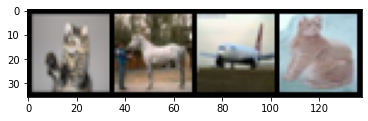

cat   horse plane cat  
(3, 32, 32)


In [4]:
# CIFAR10
# 총 60000장의 데이터셋으로 이루어져 있으며 32x32x3 크기로 이루어져 있음
# 클래스는 총 10개로 이루어져 있음

import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# 학습용 이미지를 무작위로 가져오기
dataiter = iter(cifar_trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))

# 정답(label) 출력
print(' '.join(f'{str(cifar_classes[labels[j]]):5s}' for j in range(batch_size)))

print(images[0].numpy().shape)

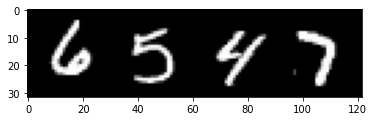

6     5     4     7    
(1, 28, 28)


In [5]:
# MNIST
# 총 60000장의 데이터셋으로 이루어져 있으며 28x28x1 크기로 이루어져 있음
# 클래스는 총 10개로 이루어져 있음

import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# 학습용 이미지를 무작위로 가져오기
dataiter = iter(mnist_trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))

# 정답(label) 출력
print(' '.join(f'{str(mnist_classes[labels[j]]):5s}' for j in range(batch_size)))

print(images[0].numpy().shape)

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class FullyConnectedNetwork(nn.Module):

  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)

  def forward(self, x):
    # 3차원의 이미지를 1차원으로 변경해야함
    # (4, 1, 28, 28) -> (4, 784)
    x = x.flatten(1)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    x = F.softmax(x, dim = 1)
    return x
  
model = FullyConnectedNetwork()

In [7]:
import torch.optim as optim

# 손실함수 선언
criterion = nn.CrossEntropyLoss()
# 옵티마이저 선언
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

In [8]:
for epoch in range(2): # 데이터셋을 수차례 반복합니다
  running_loss = 0.0
  for i, data in enumerate(mnist_trainloader, 0):
    # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
    inputs, labels = data

    # 변화도(Gradient) 매개변수를 0으로 만들고
    optimizer.zero_grad()

    # 순전파 + 역전파 + 최적화를 한 후
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # 통계를 출력합니다
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.240
[1,  4000] loss: 1.871
[1,  6000] loss: 1.704
[1,  8000] loss: 1.664
[1, 10000] loss: 1.638
[1, 12000] loss: 1.592
[1, 14000] loss: 1.586
[2,  2000] loss: 1.570
[2,  4000] loss: 1.568
[2,  6000] loss: 1.568
[2,  8000] loss: 1.563
[2, 10000] loss: 1.563
[2, 12000] loss: 1.559
[2, 14000] loss: 1.560
Finished Training


In [9]:
correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다.
with torch.no_grad():
  for data in mnist_testloader:
    images, labels = data
    # 신경망에 이미지를 통과시켜 출력을 계산합니다.
    outputs = model(images)
    # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다.
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 91 %


In [10]:
from pyparsing.helpers import PrecededBy
# 각 분류(class)에 대한 예측 값 계산을 위해 준비
correct_pred = {classname: 0 for classname in mnist_classes}
total_pred = {classname : 0 for classname in mnist_classes}

# 변화도는 여전히 필요하지 않음
with torch.no_grad():
  for data in mnist_testloader:
    images, labels = data
    outputs = model(images)
    _,predictions = torch.max(outputs, 1)
    # 각 분류별로 올바른 예측 수를 모읍니다
    for label, prediction in zip(labels, predictions):
      if label == prediction:
        correct_pred[mnist_classes[label]] += 1
      total_pred[mnist_classes[label]] += 1
# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print(f'Accuracy for class: {str(classname):5s} is {accuracy: .1f} %')

Accuracy for class: 0     is  98.1 %
Accuracy for class: 1     is  96.4 %
Accuracy for class: 2     is  88.5 %
Accuracy for class: 3     is  89.4 %
Accuracy for class: 4     is  92.9 %
Accuracy for class: 5     is  86.0 %
Accuracy for class: 6     is  92.7 %
Accuracy for class: 7     is  91.7 %
Accuracy for class: 8     is  90.5 %
Accuracy for class: 9     is  87.6 %


**GPU 모델 학습**

In [11]:
import torch.optim as optim
gpu_model = FullyConnectedNetwork()
# 손실함수 선언
criterion = nn.CrossEntropyLoss()
# 옵티마이저 선언
optimizer = optim.SGD(gpu_model.parameters(), lr = 0.001, momentum = 0.9)

for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(mnist_trainloader, 0):
    inputs, labels = data[0].to('cuda'), data[1].to('cuda')

    optimizer.zero_grad()

    gpu_model = gpu_model.to('cuda')
    outputs = gpu_model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.240
[1,  4000] loss: 1.879
[1,  6000] loss: 1.698
[1,  8000] loss: 1.647
[1, 10000] loss: 1.601
[1, 12000] loss: 1.589
[1, 14000] loss: 1.584
[2,  2000] loss: 1.570
[2,  4000] loss: 1.562
[2,  6000] loss: 1.567
[2,  8000] loss: 1.567
[2, 10000] loss: 1.561
[2, 12000] loss: 1.556
[2, 14000] loss: 1.560
Finished Training


In [12]:
correct = 0
total = 0

for data in mnist_testloader:
  images, labels = data[0].to('cuda'), data[1].to('cuda')
  gpu_model = gpu_model.to('cuda')
  outputs = gpu_model(images)
  _, predicted = torch.max(outputs.data, 1)
  total += labels.size(0)
  correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images : {100 * correct // total} %')

Accuracy of the network on the 10000 test images : 91 %


In [13]:
# 각 분류(class)에 대한 예측 값 계산을 위해 준비
correct_pred = {classname: 0 for classname in mnist_classes}
total_pred = {classname : 0 for classname in mnist_classes}

for data in mnist_testloader:
  images, labels = data[0].to('cuda'), data[1].to('cuda')
  gpu_model = gpu_model.to('cuda')
  outputs = gpu_model(images)
  _, predictions = torch.max(outputs, 1)
  for label, prediction in zip(labels, predictions):
    if label == prediction:
      correct_pred[mnist_classes[label]] += 1
    total_pred[mnist_classes[label]] += 1

for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print(f'Accuracy for class : {str(classname):5s} is {accuracy : .1f} %')

Accuracy for class : 0     is  97.8 %
Accuracy for class : 1     is  97.9 %
Accuracy for class : 2     is  88.0 %
Accuracy for class : 3     is  90.5 %
Accuracy for class : 4     is  92.7 %
Accuracy for class : 5     is  83.6 %
Accuracy for class : 6     is  94.2 %
Accuracy for class : 7     is  91.9 %
Accuracy for class : 8     is  89.7 %
Accuracy for class : 9     is  88.8 %


## **과제 수행 부분** 

In [22]:
import torch.nn as nn
import torch.nn.functional as F

class ConvolutionalNetwork(nn.Module):

  def __init__(self):
    super(ConvolutionalNetwork, self).__init__()
    # TODO Convolution Layer 설정
    self.conv1 = nn.Conv2d(
            in_channels=3,
            out_channels=8,
            kernel_size=3,
            padding=1)
    self.conv2 = nn.Conv2d(
            in_channels=8,
            out_channels=16,
            kernel_size=3,
            padding=1)
    self.pool = nn.MaxPool2d(
            kernel_size=2,
            stride=2)
    self.fc1 = nn.Linear(8 * 8 * 16, 64)
    self.fc2 = nn.Linear(64, 32)
    self.fc3 = nn.Linear(32, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = torch.relu(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = torch.relu(x)
    x = self.pool(x)

    x = x.view(-1, 8 * 8 * 16)
    x = self.fc1(x)
    x = torch.relu(x)
    x = self.fc2(x)
    x = torch.relu(x)
    x = self.fc3(x)
    x = torch.log_softmax(x, dim=1)

    return x

homework_model = ConvolutionalNetwork()

In [23]:
gpu_model = homework_model
# 손실함수 선언
criterion = nn.CrossEntropyLoss()
# 옵티마이저 선언
optimizer = optim.SGD(gpu_model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(cifar_trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data[0].to('cuda'), data[1].to('cuda')

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        gpu_model = gpu_model.to('cuda')
        outputs = gpu_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.283
[1,  4000] loss: 2.096
[1,  6000] loss: 1.867
[1,  8000] loss: 1.715
[1, 10000] loss: 1.621
[1, 12000] loss: 1.556
[2,  2000] loss: 1.464
[2,  4000] loss: 1.410
[2,  6000] loss: 1.382
[2,  8000] loss: 1.346
[2, 10000] loss: 1.317
[2, 12000] loss: 1.321
Finished Training


In [24]:
correct = 0
total = 0


for data in cifar_testloadaer:
    images, labels = data[0].to('cuda'), data[1].to('cuda')
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
    gpu_model = gpu_model.to('cuda')
    outputs = gpu_model(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %


In [25]:
# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in cifar_classes}
total_pred = {classname: 0 for classname in cifar_classes}

for data in cifar_testloadaer:
    images, labels = data[0].to('cuda'), data[1].to('cuda')

    gpu_model = gpu_model.to('cuda')
    outputs = gpu_model(images)
    _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
    for label, prediction in zip(labels, predictions):
        if label == prediction:
            correct_pred[cifar_classes[label]] += 1
        total_pred[cifar_classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 58.1 %
Accuracy for class: car   is 71.6 %
Accuracy for class: bird  is 14.2 %
Accuracy for class: cat   is 46.2 %
Accuracy for class: deer  is 65.6 %
Accuracy for class: dog   is 37.0 %
Accuracy for class: frog  is 59.8 %
Accuracy for class: horse is 52.4 %
Accuracy for class: ship  is 79.8 %
Accuracy for class: truck is 49.7 %
